In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns' , None)
 #pd.set_option('display.max_rows' , None)


**Understanding the dataset**

In [2]:
#importing the dataset
tree_census =pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20240211(1).csv')
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [3]:
#getting information of the dataset
tree_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

**Filtering out unnecessary columns**|

In [4]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [5]:
tree_census_subset =tree_census[['tree_id','tree_dbh', 'stump_diam',
                                'curb_loc', 'status', 'health', 'spc_latin', 'steward',
                                   'sidewalk', 'problems', 'root_stone',
                                   'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                                   'brch_light', 'brch_shoe', 'brch_other']].copy()



In [6]:
#we drop the unnecessary columns and made a new desired df
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [7]:
tree_census_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   tree_dbh    683788 non-null  int64 
 2   stump_diam  683788 non-null  int64 
 3   curb_loc    683788 non-null  object
 4   status      683788 non-null  object
 5   health      652172 non-null  object
 6   spc_latin   652169 non-null  object
 7   steward     164350 non-null  object
 8   sidewalk    652172 non-null  object
 9   problems    225844 non-null  object
 10  root_stone  683788 non-null  object
 11  root_grate  683788 non-null  object
 12  root_other  683788 non-null  object
 13  trunk_wire  683788 non-null  object
 14  trnk_light  683788 non-null  object
 15  trnk_other  683788 non-null  object
 16  brch_light  683788 non-null  object
 17  brch_shoe   683788 non-null  object
 18  brch_other  683788 non-null  object
dtypes: int64(3), object(16)

**Missing value check**

In [8]:
#checking of null values
tree_census_subset.isnull().sum()

tree_id            0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health         31616
spc_latin      31619
steward       519438
sidewalk       31616
problems      457944
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
dtype: int64

In [9]:
tree_census_subset[tree_census_subset['health'].isnull()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


**Outliers Check**


In [10]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [11]:
#lets us see the distribution of above values using a histogram


C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Histogram of trees diameter'}, xlabel='tree_dbh', ylabel='Count'>

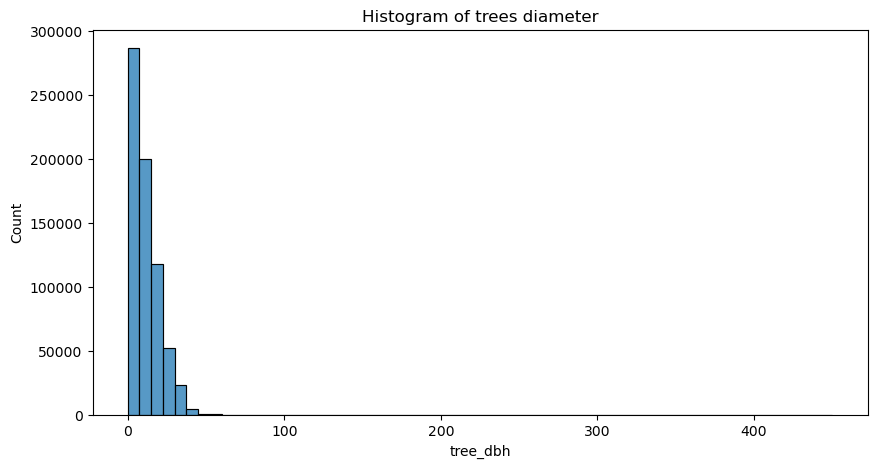

In [12]:
plt.figure(figsize=(10,5))
plt.title('Histogram of trees diameter')
sns.histplot(data=tree_census_subset, x='tree_dbh',bins=60)

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Histogram of stump diameter'}, xlabel='stump_diam', ylabel='Count'>

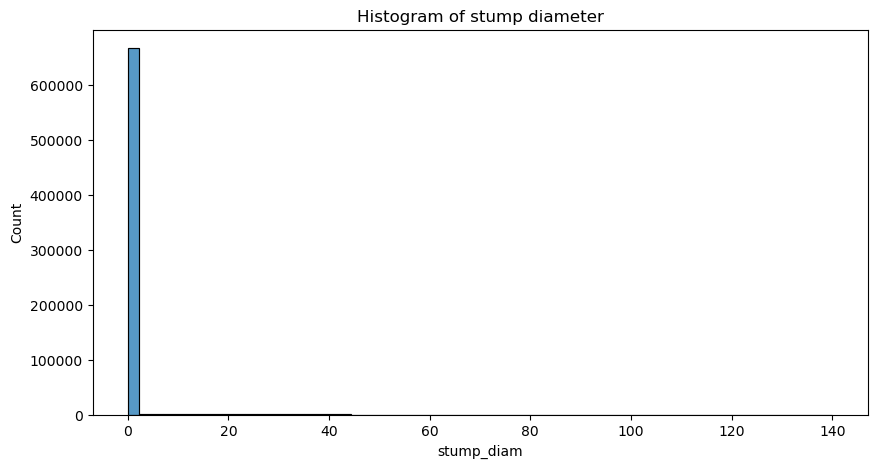

In [13]:
plt.figure(figsize=(10,5))
plt.title('Histogram of stump diameter')
sns.histplot(data=tree_census_subset, x='stump_diam',bins=60)

In [14]:
#from above graphs we can see there are some trees diameter and stump diamter 
#whose values are quite unreasonable. Those values can be considered as outliers present in dataset 

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Plot between tree id and tree diameter'}, xlabel='tree_id', ylabel='tree_dbh'>

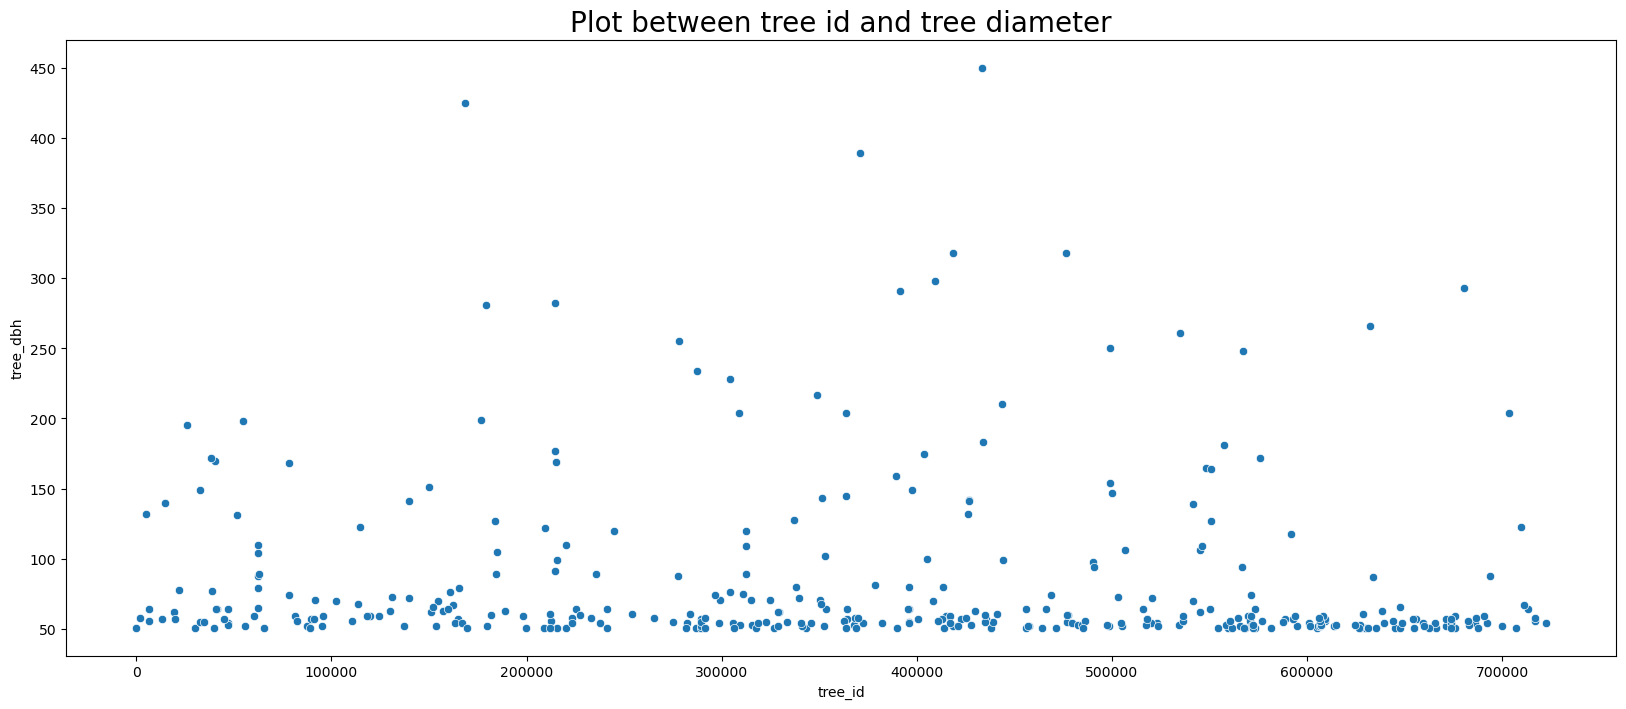

In [15]:
z=tree_census_subset[tree_census_subset['tree_dbh']>50]

plt.figure(figsize=(20,8))
plt.title('Plot between tree id and tree diameter',size=20)
sns.scatterplot(data=z,x='tree_id',y='tree_dbh')

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Plot between tree id and stump diameter'}, xlabel='tree_id', ylabel='stump_diam'>

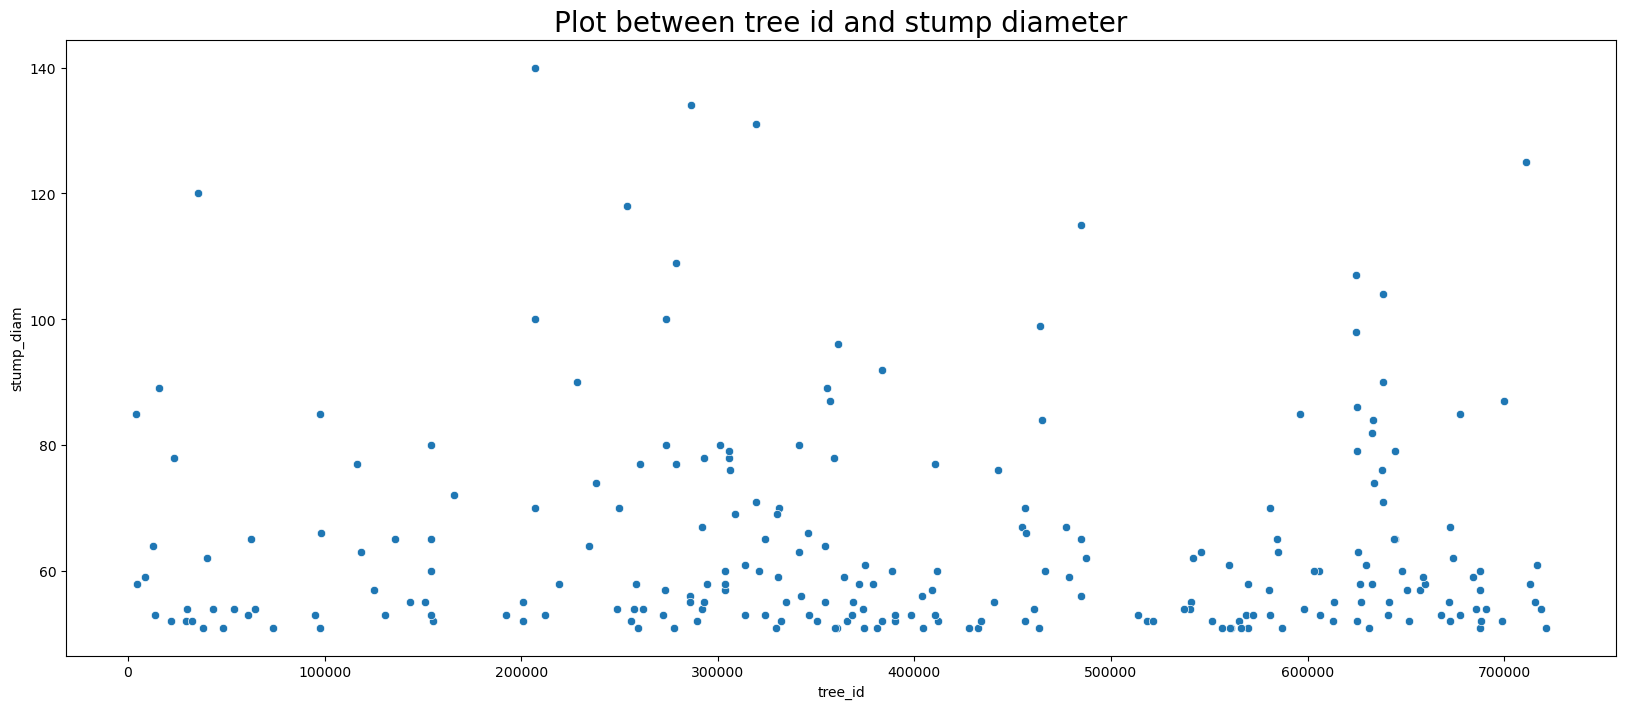

In [16]:
z=tree_census_subset[tree_census_subset['stump_diam']>50]

plt.figure(figsize=(20,8))
plt.title('Plot between tree id and stump diameter',size=20)
sns.scatterplot(data=z,x='tree_id',y='stump_diam')

**Categorical value check**

In [17]:
#visualizion of number of different trees on basic of their latin name


<Axes: xlabel='spc_latin'>

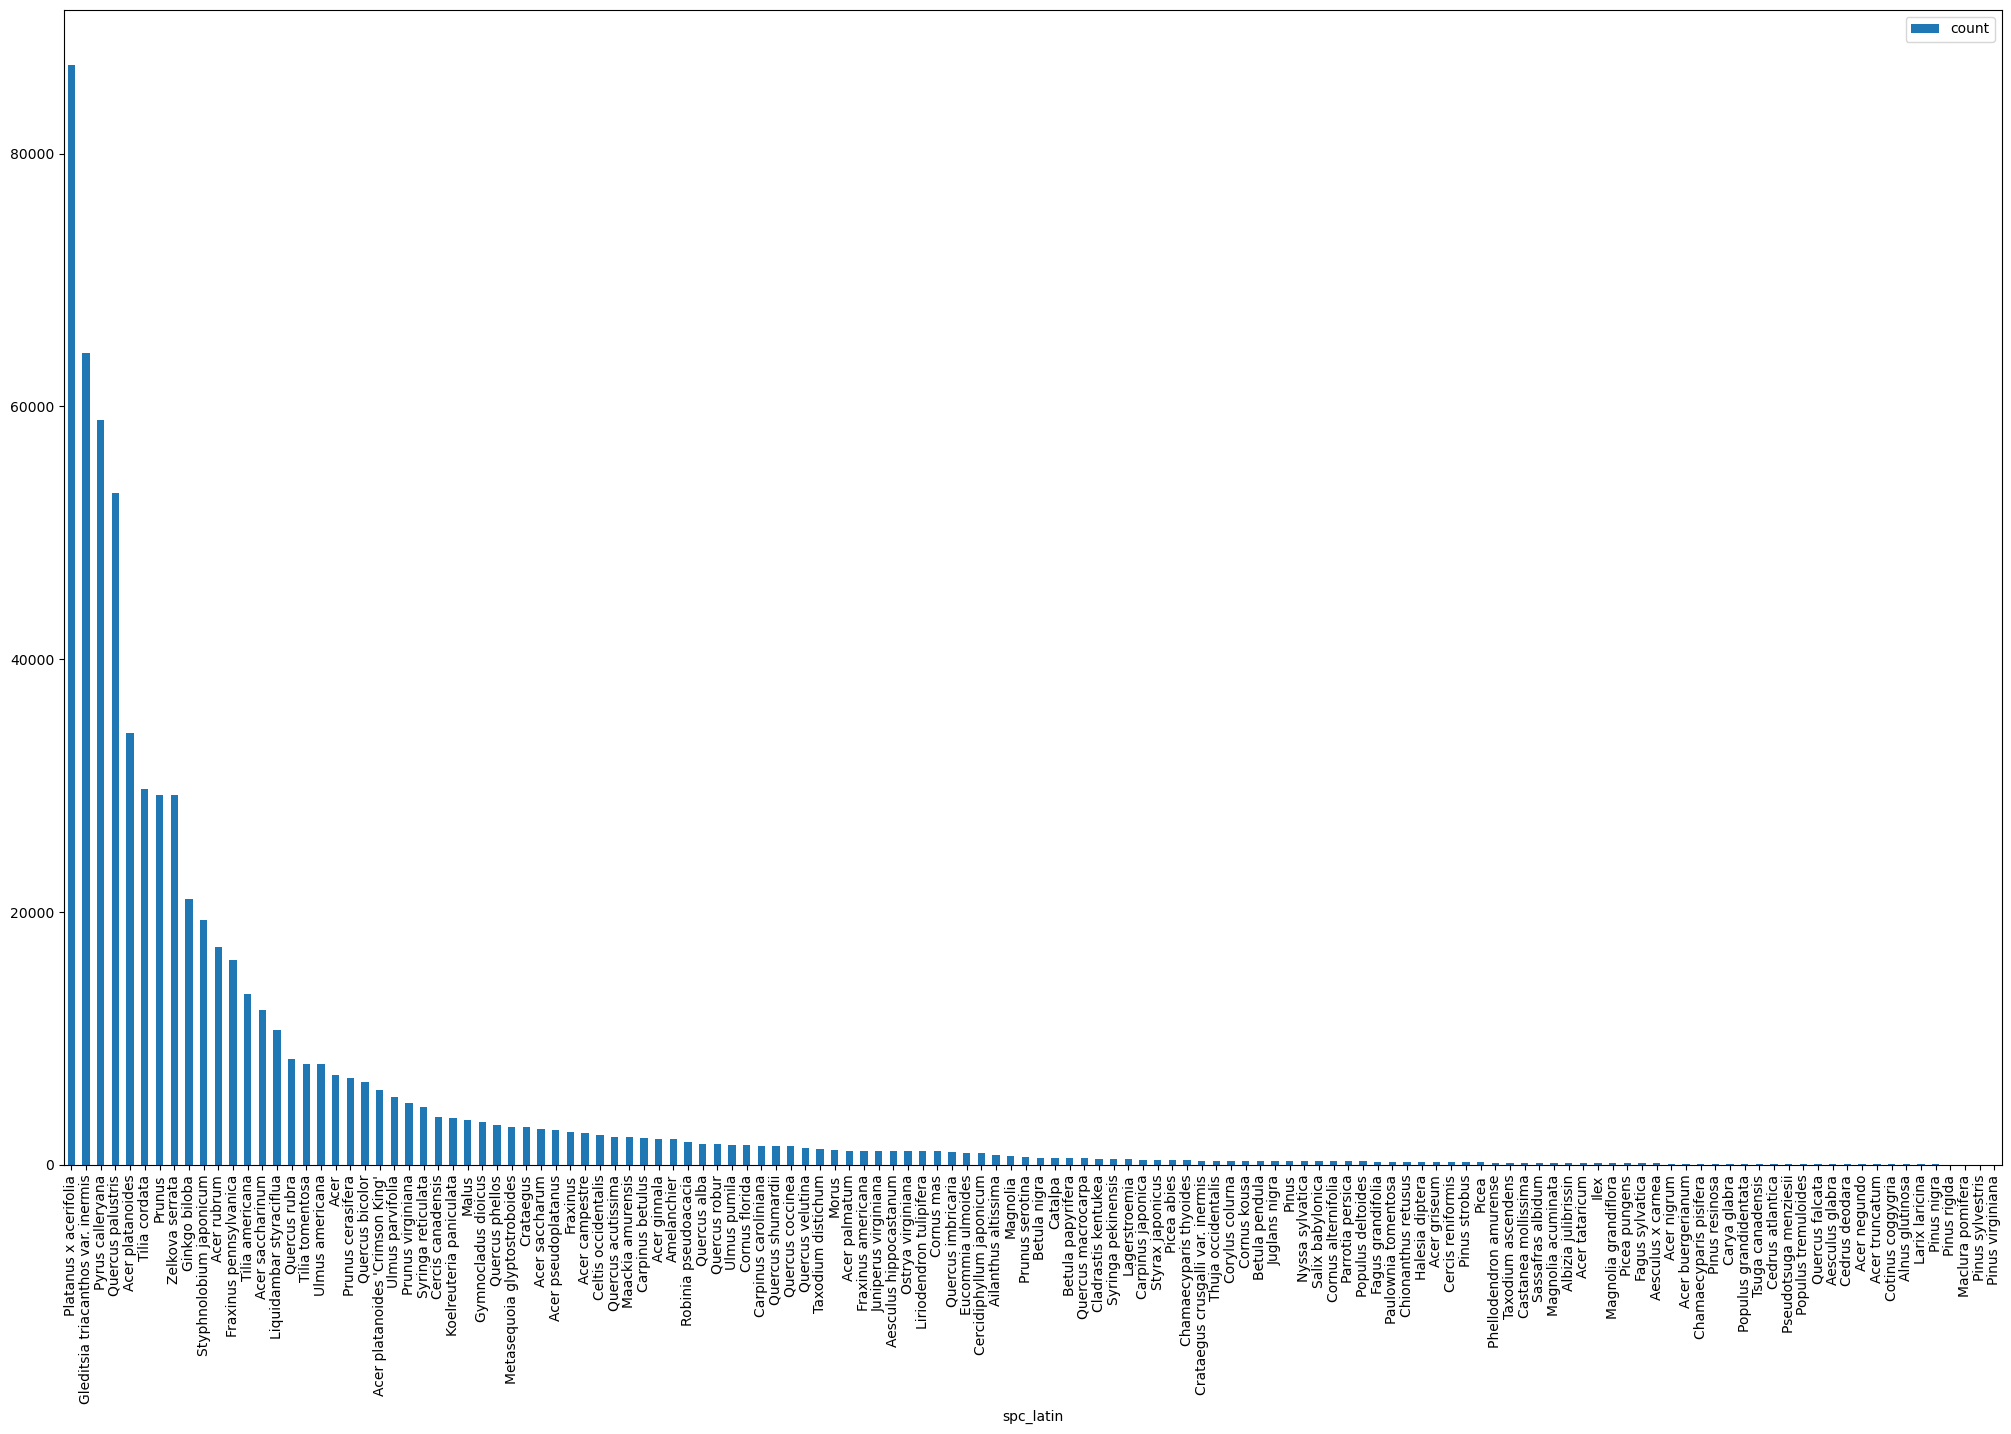

In [18]:
pd.DataFrame(tree_census_subset['spc_latin'].value_counts()).plot(kind='bar',figsize=(25,15))


In [24]:
stump =tree_census_subset[tree_census_subset['status']=='Stump']
stump

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [27]:
deads=tree_census_subset[tree_census_subset['status']=='Dead']
deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


**Exploration of distribution of binary columns**

In [28]:
tree_census_subset.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'],
      dtype='object')

In [32]:
tree_problems=tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]

tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [38]:
tree_problems.apply(pd.Series.value_counts) 

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [39]:
#We can tell that root_stone problem is major and exists alot of time